# Mathematical Background
We will explain the mathematical methods used in machine learning and big data analysis.
In machine learning and big data analysis, we use models that are predefined in mathematical equations.
When the input-output relationship is deterministic, the model is defined as a function.
When it's not deterministic, the model is defined as a probability distribution.

## Differentiation
Differentiation is a fundamental method for knowing the properties of a function.
Especially for multivariate functions where graphing is not possible, it is the only method.

### 2d-graph

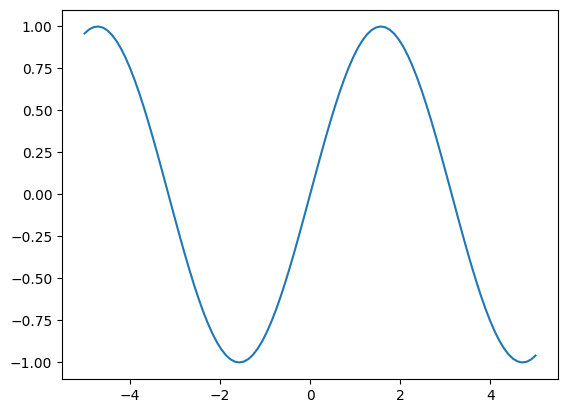

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = np.sin(x)
plt.plot(x, y)

### 3-d graph

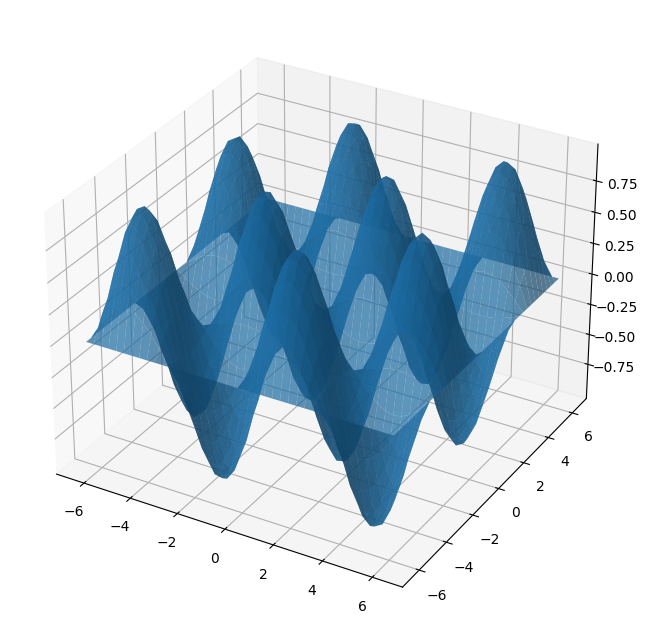

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def func(x, y):
    return np.sin(x) * np.sin(y)

x = np.linspace(-np.pi*2, np.pi * 2, 40)
y = np.linspace(-np.pi*2, np.pi * 2, 40)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, func(X,Y), alpha=0.7)
plt.show()

How do you draw a graph in 4 dimensions or higher?
Of course, not only is it impossible to draw, but even imagining it is difficult.
However, we can understand the local shape of the graph.
This is because, no matter how complex the surface, it can be locally viewed as a plane.
It's similar to the illusion that, while the Earth is round, humans feel like they are on a flat plane.
Regarding the surface locally as a plane in this manner, we can grasp a rough outline of the complex surface.
This allows us to locate higher points (or lower points) on the surface.

### Differentiation of a function with a single valiable
Differentiation of a single variable is simple.
Let's examine the relationship between several functions and their derivatives.

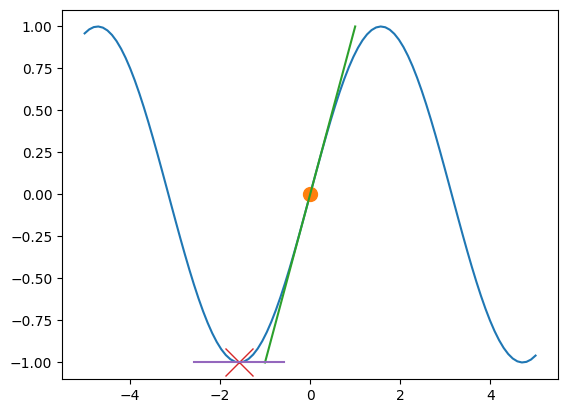

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = np.sin(x)
plt.plot(x, y)

a = np.cos(0)

# Gradient at (0, 0)
plt.plot(0, 0, marker='.', markersize=20)
sample_x = np.linspace(-1, 1, 10)
sample_y = a * sample_x
plt.plot(sample_x, sample_y)

# Gradient as (pi/2, sin(pi/2))
a = np.cos(-np.pi / 2)
b = np.sin(-np.pi/2) - a * -np.pi/2
plt.plot(-np.pi / 2, np.sin(-np.pi/2), marker='x', markersize=20)
sample_x = np.linspace(-np.pi/2 - 1, -np.pi/2 + 1)
sample_y = a * sample_x + b
plt.plot(sample_x, sample_y)

From the above figure, by looking at the line with its slope as the derivative, we can predict in which direction the value will increase or decrease.
Using this idea, optimization to find the minimum or maximum values becomes possible.

### Differentiation of a function with 2 variables
In differentiation of a function with two variables, since there are multiple variables, it is expressed as a combination of the gradient of each variable.
Therefore, the differentiation is represented as a two-dimensional vector.
When differentiating with one variable, since the other variable is unrelated, it is called partial differentiation.
The process itself is simple; differentiate by treating all variables other than the one you want to differentiate at the moment as constants.
$$ f(x, y) = \sin(x) * \cos(y) $$
$$ {\rm Gradient:} (\cos(x), -\sin(y)) $$ 

For functions with more variables, the differenciation can be calculated in a similar manner.

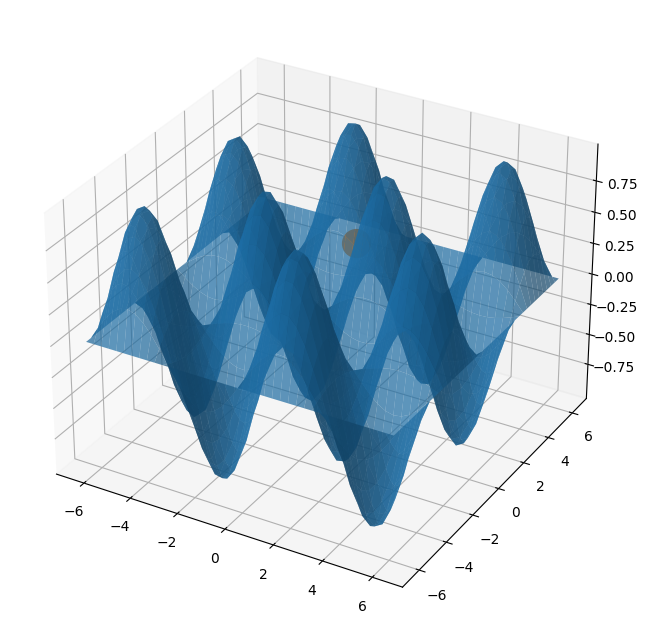

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def func(x, y):
    return np.sin(x) * np.sin(y)

x = np.linspace(-np.pi*2, np.pi*2, 40)
y = np.linspace(-np.pi*2, np.pi*2, 40)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, func(X,Y), alpha=0.7)

z = func(np.pi/4, np.pi/4)
plt.plot(np.pi/4, np.pi/4, z, 'o')


### The chain rule of differentiation
When differentiating composite functions (functions where the output of one function becomes the input of another), the chain rule is effective.
In neural networks, the output of the previous layer becomes the input for the next layer.
Therefore, it can be considered as a composite function.
When differentiating the functions, the chain rule is utilized.
The chain rule itself is straightforward: you simply multiply the differentiation of each function to get the differentiation of the composite function.
$$ \frac{d f(g(x))}{d x} = \frac{d f(x)}{d x} \frac{d g(x)}{d x} $$

In the training of neural networks, this characteristic of the chain rule is crucial, leading to the development of a learning algorithm called backpropagation.

## Probability
When the relationship between input and output is not deterministic, a model is constructed using probability.
Probability refers to a function that outputs a value between 0 and 1 for all inputs, such that the total sum is 1.
For example, if for the input $x$, there are $n$ possible outputs, their respective probabilities can be written as follows:
$$ (p_1(x), p_2(x), \cdots, p_n(x)) $$
Here, if we actually observe the $k$ outputs $(o_1, o_2, \cdots, o_k)$ for the given input $(x_1, x_2, \cdots, x_k)$, the probability of obtaining this observation is defined as as the product of the probabilities of observing each individual output.
$$ p(o_1, o_2, \cdots, o_k) = p_{o_1}(x_1)p_{o_2}(x_2) \cdots p_{o_k}(x_k) $$

Now, let's consider constructing such a probability model and learning from observed data.
Since the data has been observed in reality, it is reasonable to think that there's a high likelihood of such an outcome.
We should learn in a way that maximizes the probability mentioned earlier.
This strategy is very simple and is processed in the following steps.
1. Determine the probability distribution from which observations are obtained.
2. Define the probability of obtaining the actually observed data based on the previous probability distribution.
3. Maximize the probability using defferentiation.
    1. Calculate the negative log-likelihood. $ -\log\left( p(o_1, o_2, \cdots, o_k) \right) = \sum_{i=1}^k -\log\left(p_{o_i}(x_i)\right)$
    2. Minimize the negative log-liklihood.